In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline

The original data set was taken from https://data.world/sportsvizsunday/nfl-combine-data, and it includes NFL Combine results from the years 1987 to 2018. The NFL Combine results from the years 2019 and 2020 were added to the data set from https://nflcombineresults.com/ to create the NFL Combine Data cleaned.csv data set that is used in this project. Due to COVID restrictions, the traditional 2021 NFL Combine was [officially canceled](https://twitter.com/AdamSchefter/status/1351302592538828802) so there is no data for the 2021 NFL Combine included in this project. We are also using the [NFL.com concussion data](https://www.nfl.com/playerhealthandsafety/health-and-wellness/injury-data/injury-data) to create a dataframe listing the total number of concussion from the Years 2012 to 2019.

In [2]:
# Create dataframe of total concussions from the Years 2012 to 2019
# Create a list of years
lst = [year for year in range(2012,2020)]
  
# list of the number of concussions
lst2 = [261,229,206,275,243,281,214,224]
  
# Calling DataFrame constructor after zipping
# both lists, with columns specified
concussion_df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['Year', 'Total_num_of_concussions'])
concussion_df

,Year,Total_num_of_concussions
0,2012,261
1,2013,229
2,2014,206
3,2015,275
4,2016,243
5,2017,281
6,2018,214
7,2019,224


In [3]:
# Import the file, create the dataframe, and view the dataframe info
NFL_Combine_1987_to_2020 = pd.read_csv('NFL Combine Data cleaned.csv')
NFL_Combine_1987_to_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10736 entries, 0 to 10735
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         10736 non-null  int64  
 1   Name         10736 non-null  object 
 2   POS          10736 non-null  object 
 3   Height       10736 non-null  float64
 4   Weight       10736 non-null  int64  
 5   Forty_Yard   9768 non-null   float64
 6   Bench_Press  7428 non-null   float64
 7   Vert_Leap    8750 non-null   float64
 8   Broad_Jump   8589 non-null   float64
 9   Shuttle      7692 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 838.9+ KB


In [4]:
NFL_Combine_1987_to_2020.head()

,Year,Name,POS,Height,Weight,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle
0,1987,Rod Woodson,CB,72.0,202,4.33,10.0,36.0,125.0,3.98
1,1987,Greg Richardson,WR,67.3,164,4.35,1.0,28.0,113.0,4.21
2,1987,Eric Thomas,CB,70.3,171,4.38,7.0,35.0,126.0,4.22
3,1987,Ricky Nattiel,WR,68.9,178,4.41,NaN,32.0,116.0,NaN
4,1987,Haywood Jeffires,WR,74.1,191,4.41,NaN,NaN,NaN,NaN


### Variable descriptions

• Height – Measure of player height in inches.  
• Weight - Measure of player weight in pounds.  
• Forty_Yard – Measure of the time elapsed for the player to run the 40-yard dash.  
• Bench_Press - Measure of the number of barbell bench press repetitions completed using 225 lb.  
• Vert_Leap – Measure of how high the player jumped.  
• Broad_Jump – Measure of how far the player jumped horizontally from a standstill.  
• Shuttle – Measure of time elapsed to run a 20-yard lateral shuttle.   
• Year – The year the measurements were taken at the NFL Combine.  
• POS - Position that the player plays.

Now that we have our variables defined, we can take a look at the summary statistics.

In [5]:
NFL_Combine_1987_to_2020.POS.value_counts()

WR     1454
CB     1095
RB     1003
OLB     835
DT      822
OT      816
DE      811
OG      708
TE      635
QB      634
ILB     510
SS      425
FS      407
C       328
FB      253
Name: POS, dtype: int64

We want to group players of similar-sized positions, as these players are likely to have similar combine drill measurements. We will use a seaborn violin plot to explore the average player weights of each position.

### Visualizing average player weights for each position.

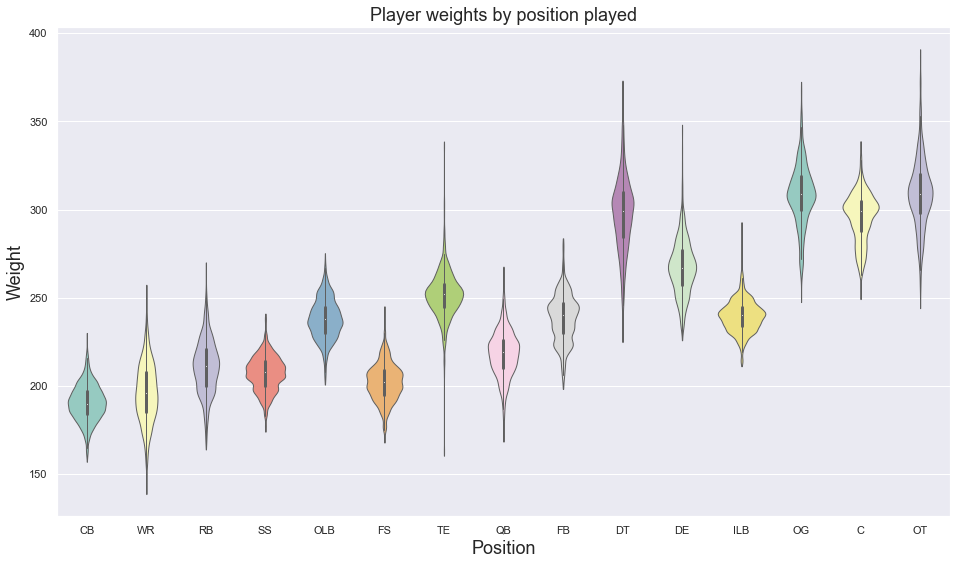

In [6]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='POS',y='Weight',data=NFL_Combine_1987_to_2020,palette="Set3", bw=.2, cut=1, linewidth=1)

# Add title and axis labels
plt.title('Player weights by position played', fontsize=18)
plt.xlabel('Position', fontsize=18)
plt.ylabel('Weight', fontsize=18);

In [7]:
NFL_Combine_1987_to_2020.columns

Index(['Year', 'Name', 'POS', 'Height', 'Weight', 'Forty_Yard', 'Bench_Press',
       'Vert_Leap', 'Broad_Jump', 'Shuttle'],
      dtype='object')

There is a broad range of weights in the plot above, but we can see three natural groupings for the player positions.  

**Group 1: [CB, WR, RB, SS, FS]** - Cornerback, Wide Receiver, Running Back, Strong Safety, and Free Safety.  
The positions are similar sized and they match-up against each other on almost every play.   

**Group 2: [OLB, TE, QB, FB, ILB]** - Outside Linebacker, Tight End, Quarterback, Fullback, and Inside Linebacker.  
This is another grouping of similarly sized players. 

**Group 3: [DT, DE, OG, C, OT]** - Defensive Tackle, Defensive End, Offensive Guard, Center, and Offensive Tackle.  
These are the large lineman that lineup at the line of scrimmage.  

We will create a new categorical variable based on the the three groupings above.

In [8]:
def add_position_grouping(df):
    add_position_grouping = { 'CB': 'WR_RB_DB', 'WR': 'WR_RB_DB','RB': 'WR_RB_DB','SS': 'WR_RB_DB','FS': 'WR_RB_DB',
                           'DT': 'lineman','DE': 'lineman','OG': 'lineman','C': 'lineman','OT': 'lineman',
                           'OLB': 'LB_FB_TE_QB','TE': 'LB_FB_TE_QB','QB': 'LB_FB_TE_QB','FB': 'LB_FB_TE_QB','ILB': 'LB_FB_TE_QB'}
    df['position_group'] = df['POS'].map(lambda x: add_position_grouping[x])

In [9]:
add_position_grouping(NFL_Combine_1987_to_2020)

In [10]:
NFL_Combine_1987_to_2020

,Year,Name,POS,Height,Weight,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,position_group
0,1987,Rod Woodson,CB,72.0,202,4.33,10.0,36.0,125.0,3.98,WR_RB_DB
1,1987,Greg Richardson,WR,67.3,164,4.35,1.0,28.0,113.0,4.21,WR_RB_DB
2,1987,Eric Thomas,CB,70.3,171,4.38,7.0,35.0,126.0,4.22,WR_RB_DB
3,1987,Ricky Nattiel,WR,68.9,178,4.41,NaN,32.0,116.0,NaN,WR_RB_DB
4,1987,Haywood Jeffires,WR,74.1,191,4.41,NaN,NaN,NaN,NaN,WR_RB_DB
...,...,...,...,...,...,...,...,...,...,...,...
10731,2020,Khalid Kareem,DT,76.0,265,NaN,NaN,NaN,NaN,NaN,lineman
10732,2020,Trevis Gipson,DT,76.0,259,NaN,25.0,NaN,NaN,NaN,lineman
10733,2020,Chase Young,DT,77.0,265,NaN,NaN,NaN,NaN,NaN,lineman
10734,2020,Yetur Gross-Matos,DT,77.0,264,NaN,20.0,34.0,120.0,NaN,lineman


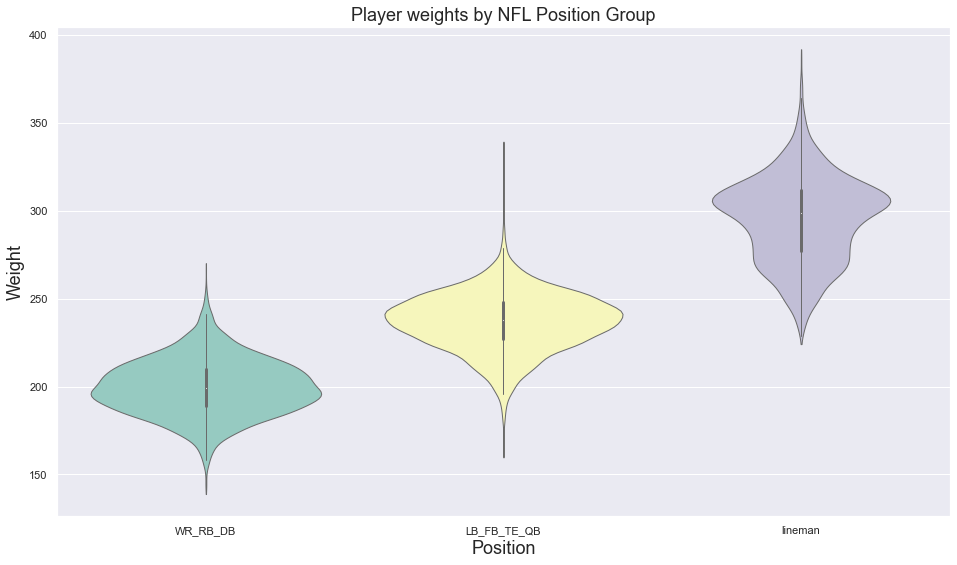

In [11]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='position_group',y='Weight',data=NFL_Combine_1987_to_2020,palette="Set3", bw=.2, cut=1, linewidth=1)

# Add title and axis labels
plt.title('Player weights by NFL Position Group', fontsize=18)
plt.xlabel('Position', fontsize=18)
plt.ylabel('Weight', fontsize=18);

We will export the dataframes for use in PowerBI.

In [ ]:
NFL_Combine_1987_to_2020.to_csv (r'C:\Users\dlbry\Downloads\DSC 640\DSC 640 Final Project\NFL Combine Data final.csv', index = False, header=True)
concussion_df.to_csv (r'C:\Users\dlbry\Downloads\DSC 640\DSC 640 Final Project\NFL Concussion Data.csv', index = False, header=True)